In [367]:
def display_img(src, description=None, is_src_url=False):
    from IPython.display import Image
    from IPython.core.display import HTML 
    if description is not None: print(description)
    if is_src_url:
        display(Image(url=src))
    else:
        display(Image(filename=src))

# Objective:
- ## Scrape information about each fighter, such as height, weight, etc.

In [368]:
import requests as rq
from bs4 import BeautifulSoup
import re

# Function below returns key and value, as shown on the picture:

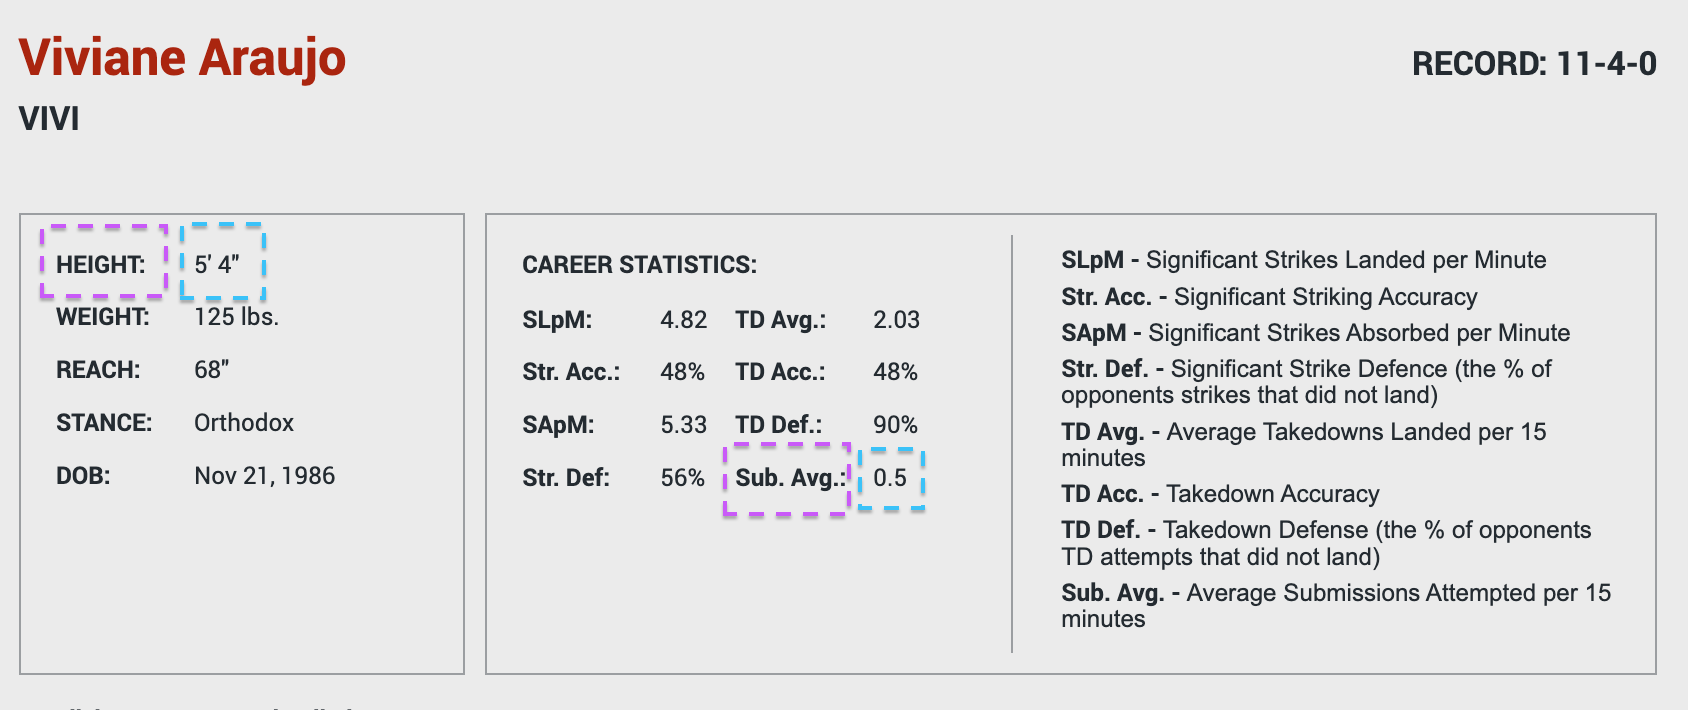

In [369]:
display_img('img/fighter info/key value.png')

def get_key_value(s):
    try:
        s = s.replace('\n', '')
        # print('splitting: ' + s)
        key, value = s.split(':', 1)
        key = key.strip(' ')
        value = value.strip(' ')
        # print(f'Returning: {key}, {value}')
        return key, value
    except:
        return (-1, -1)

# This function returns fighter's record:

In [370]:
def get_name(soup):
    name = soup.find('span', class_='b-content__title-highlight').text.strip()
    # print(name)
    return name

In [375]:
def get_record(soup):
    record = soup.find('span', class_='b-content__title-record').text.split(':')[1].replace('\n', '').strip()
    # print(record)
    return record

In [376]:
urls_per_page = list()

for i in range(1,25):
    with open(f"urls/page_{i}", 'r') as page:
        urls_per_page.append(page.readlines())

In [377]:
def file_exists(file_path):
    import os.path
    return os.path.isfile(file_path) 

In [381]:
for i, page_urls in enumerate(urls_per_page):
    csv_name = f'fighters/page_{i+1}'
    if file_exists(csv_name):
        print(f'File {csv_name} exists!')
        continue
    page_df = pd.DataFrame()
    for url in page_urls:
        url  = url.strip('\n')
        # scraping fight page
        page = rq.get(url)
        soup = BeautifulSoup(page.text, 'html.parser')
        # getting links to fighter pages
        results = soup.findAll('a', class_='b-link b-link_style_black')[:2]
        dff = pd.DataFrame()
        colors = ['Red_', 'Blue_']
        for i, color in enumerate(colors):
            page = rq.get(results[i]['href'])
            soup = BeautifulSoup(page.text, 'html.parser')
            # getting fighter info
            d = dict()
            d[color + 'Name'] = get_name(soup)
            d[color + 'Record'] = get_record(soup)
            infos = soup.findAll('li', class_='b-list__box-list-item b-list__box-list-item_type_block')
            for info in infos:
                # print(res.text)
                key, value = get_key_value(info.text)
                if key == value == -1:
                    print('UFC front-end error')
                    continue
                d[color + key] = value
            df = pd.DataFrame([d])
            dff = pd.concat([dff, df], axis=1)
            # display(dff)
        page_df = pd.concat([page_df, dff], axis=0)
    page_df.to_csv(csv_name, index=False)
    # display(page_df)

File fighters/page_1 exists!
File fighters/page_2 exists!
File fighters/page_3 exists!
File fighters/page_4 exists!
File fighters/page_5 exists!
File fighters/page_6 exists!
File fighters/page_7 exists!
File fighters/page_8 exists!
File fighters/page_9 exists!
File fighters/page_10 exists!
File fighters/page_11 exists!
File fighters/page_12 exists!
File fighters/page_13 exists!
File fighters/page_14 exists!
File fighters/page_15 exists!
File fighters/page_16 exists!
File fighters/page_17 exists!
File fighters/page_18 exists!
File fighters/page_19 exists!
File fighters/page_20 exists!
File fighters/page_21 exists!
File fighters/page_22 exists!
File fighters/page_23 exists!
File fighters/page_24 exists!
